<a href="https://colab.research.google.com/github/inefable12/upn2024/blob/main/Clase2_C_discurso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://media.giphy.com/avatars/UPN_edu/BohC4JwcStCB.gif" width="100" alt="nlp logo"  />

___

$$\large\textbf{Codificación para el análisis de datos para no programadores}$$
$$\textit{Parte Práctica C: Análisis de discurso presidencial con NLP}$$

_Docente: Jesus Alvarado Huayhuaz_

_13 de diciembre de 2024_
___

# 1. Instalar requerimientos

In [1]:
!pip install -q condacolab
import condacolab
condacolab.install()

⏬ Downloading https://github.com/conda-forge/miniforge/releases/download/23.11.0-0/Mambaforge-23.11.0-0-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:16
🔁 Restarting kernel...


In [2]:
# Dar enter para continuar
!conda install -c anaconda nltk

Channels:
 - anaconda
 - conda-forge
Platform: linux-64
Solving environment: / - \ done


==> WARNING: A newer version of conda exists. <==
    current version: 23.11.0
    latest version: 24.11.1

Please update conda by running

    $ conda update -n base -c conda-forge conda



## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - nltk


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2024.11.26 |       h06a4308_0         138 KB  anaconda
    certifi-2024.8.30          |  py310h06a4308_0         164 KB  anaconda
    click-8.1.7                |  py310h06a4308_0         151 KB  anaconda
    conda-23.11.0              |  py310h06a4308_0        1013 KB  anaconda
    joblib-1.4.2               |  py310h06a4308_0         407 KB  anaconda
    nltk-3.9.1                 |  py310h06a4308_0         2.2 MB  anaconda
    regex-2024.9.11      

**Nota**:

Hasta aquí probablemente te apareció un mensaje del reinicio de la sesión.

No te preocupes, ejecuta la siguiente celda para verificar la instalación

In [1]:
!conda --version

conda 23.11.0


In [2]:
import nltk

In [3]:
nltk.download()
# "q" para salir
# nltk.download('stopwords'), esta descarga es requerida más adelante

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


True

# 2. Análisis de discursos de presidentes en la ONU

Los representantes de los países de todo el mundo se reúnen todos los años para la reunión General
de las Naciones Unidas. El archivo JSON llamado __"session74.json"__ contiene los discursos
pronunciados por delegados de cuatro países durante el Debate General de la 74.a Sesión (2019) de esa asamblea:
Francia, Rusia, Turquía y Estados Unidos. Todos los discursos están en idioma inglés.

## 2.1 Cargamos el texto

In [4]:
import nltk
nltk.download('punkt')
nltk.download("stopwords")

# Descargamos los discursos
!wget -O session74.json https://raw.githubusercontent.com/inefable12/nlp/refs/heads/main/session74.json
session = "session74.json"
# Cargamos el texto
file = open(session,'rt')
text = file.read()
file.close()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


--2024-12-13 23:10:20--  https://raw.githubusercontent.com/inefable12/nlp/refs/heads/main/session74.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 95253 (93K) [text/plain]
Saving to: ‘session74.json’

session74.json      100%[===================>]  93.02K  --.-KB/s    in 0.01s   

2024-12-13 23:10:20 (7.12 MB/s) - ‘session74.json’ saved [95253/95253]



### A. Escriba un código que cargue los cuatro documentos (discursos) y los procese previamente. Específicamente, tokenizar cada documento, eliminar palabras vacías, eliminar la puntuación y convertir cada palabra en minúsculas.

In [5]:
# Separar discursos
import json
speeches = json.loads(text)
france = speeches["France"]
united_states = speeches["USA"]
russia = speeches["Russia"]
turkey = speeches["Turkey"]

#### Tokenización

In [6]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [7]:
from nltk.tokenize import word_tokenize, sent_tokenize

In [8]:
tk_france = word_tokenize(france)

In [9]:
# Librerias necesarias
from nltk.tokenize import word_tokenize
import string
from nltk.corpus import stopwords

In [10]:
# tokens por pais
tokenized_country = {}
for country in speeches:

    # split into words
    tokens = word_tokenize(speeches[country])

    # convert to lower case
    tokens = [w.lower() for w in tokens]

    # remove punctuation from each word
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in tokens]

    # remove remaining tokens that are not alphabetic
    words = [word for word in stripped if word.isalpha()]

    # filter out stop words
    stop_words = set(stopwords.words('english'))
    words = [w for w in words if not w in stop_words]

    tokenized_country[country] = words

In [11]:
speeches.keys()

dict_keys(['France', 'Russia', 'Turkey', 'USA'])

In [12]:
tokenized_country.keys()

dict_keys(['France', 'Russia', 'Turkey', 'USA'])

In [15]:
tokenized_country['France'][0:10]

['gathered',
 'general',
 'assembly',
 'time',
 'secretarygeneral',
 'chosen',
 'important',
 'theme',
 'climate',
 'met']

In [16]:
speeches['France'][0:100]

'We are gathered here at the General Assembly at a time when the Secretary-General has chosen the ver'

Observamos que palabras como "we", "are", "here", etc, han sido tokenizados

In [17]:
tokenized_country['Russia'][0:10]

['getting',
 'ever',
 'closer',
 'seventyfifth',
 'anniversary',
 'united',
 'nations',
 'established',
 'thanks',
 'victory']

In [18]:
speeches['Russia'][0:100]

'We are getting ever closer to the seventy-fifth anniversary of the United Nations, which was establi'

### B. Busque los 10 tokens más frecuentes para cada documento (país) e informe resultados como su respuesta.

In [19]:
from nltk import FreqDist

In [20]:
tokenized_country.keys()

dict_keys(['France', 'Russia', 'Turkey', 'USA'])

In [21]:
fdist = FreqDist(tokenized_country['France'])
fdist.most_common(10)

[('must', 36),
 ('believe', 23),
 ('climate', 22),
 ('countries', 20),
 ('change', 19),
 ('courage', 19),
 ('fight', 17),
 ('us', 16),
 ('many', 15),
 ('agenda', 15)]

In [22]:
fdist = FreqDist(tokenized_country['Russia'])
fdist.most_common(10)

[('united', 24),
 ('security', 23),
 ('states', 20),
 ('nations', 17),
 ('international', 15),
 ('countries', 14),
 ('russia', 14),
 ('also', 13),
 ('world', 12),
 ('rules', 11)]

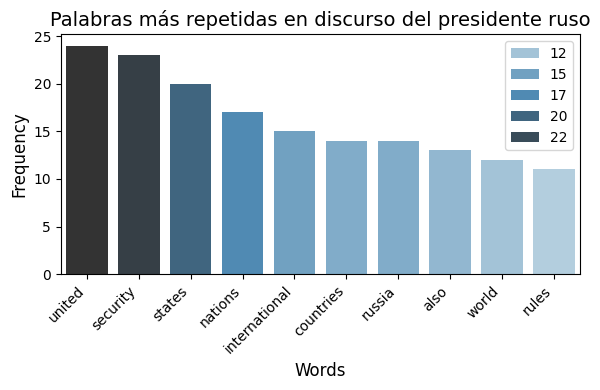

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
data = fdist.most_common(10)

# Desempaquetamos las palabras y sus frecuencias
words, frequencies = zip(*data)

# Creamos un DataFrame para seaborn
import pandas as pd
df = pd.DataFrame({'word': words, 'frequency': frequencies})

# Graficamos
plt.figure(figsize=(6, 4))
sns.barplot(x='word', y='frequency', data=df, palette='Blues_d', hue=frequencies)

# Agregamos título y etiquetas
plt.title('Palabras más repetidas en discurso del presidente ruso', fontsize=14)
plt.xlabel('Words', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Mostrar la gráfica
plt.tight_layout()
plt.show();

En resumen, tokens son sustantivos y/o verbos, mientras que los stopwords son artículos, conectores, etc.

### C. Encuentra dos tokens seguidos que se mencionan constantemente

In [23]:
import collections

In [25]:
# Para generar n-grams
ngrams_russia = list(nltk.ngrams(tokenized_country["Russia"],2))

In [31]:
ngrams_russia[0:5]

[('getting', 'ever'),
 ('ever', 'closer'),
 ('closer', 'seventyfifth'),
 ('seventyfifth', 'anniversary'),
 ('anniversary', 'united')]

In [26]:
ngrams_usa = list(nltk.ngrams(tokenized_country["USA"],2))

In [27]:
# using Counter to find frequency of elements
ngrams_russia_count = collections.Counter(ngrams_russia)
ngrams_usa_count = collections.Counter(ngrams_usa)  # dictionary

In [32]:
# Primeros 10 ngrams
ngrams_russia_items = ngrams_russia_count.items()
first_russia = list(ngrams_russia_items)[:10]
first_russia

[(('getting', 'ever'), 1),
 (('ever', 'closer'), 1),
 (('closer', 'seventyfifth'), 1),
 (('seventyfifth', 'anniversary'), 1),
 (('anniversary', 'united'), 2),
 (('united', 'nations'), 15),
 (('nations', 'established'), 1),
 (('established', 'thanks'), 1),
 (('thanks', 'victory'), 1),
 (('victory', 'second'), 1)]

In [33]:
a1 = ngrams_russia_count.copy()  # copiar diccionario
a1_sorted_keys = sorted(a1, key=a1.get, reverse=True)  # ordenar los valores del diccionario
collections_russia = []  # listar clave y valor del diccionario ya ordenado
for r in a1_sorted_keys:
    collections_russia.append((r, a1[r]))

Resultado en orden decreciente

In [34]:
collections_russia[:10]

[(('united', 'nations'), 15),
 (('security', 'council'), 10),
 (('united', 'states'), 9),
 (('international', 'law'), 6),
 (('world', 'war'), 3),
 (('international', 'community'), 3),
 (('council', 'resolutions'), 3),
 (('would', 'like'), 3),
 (('general', 'assembly'), 3),
 (('president', 'putin'), 3)]

<ipython-input-59-a1b2e3ced52d>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='frequency', y='bigram', data=df, palette='Blues_d')


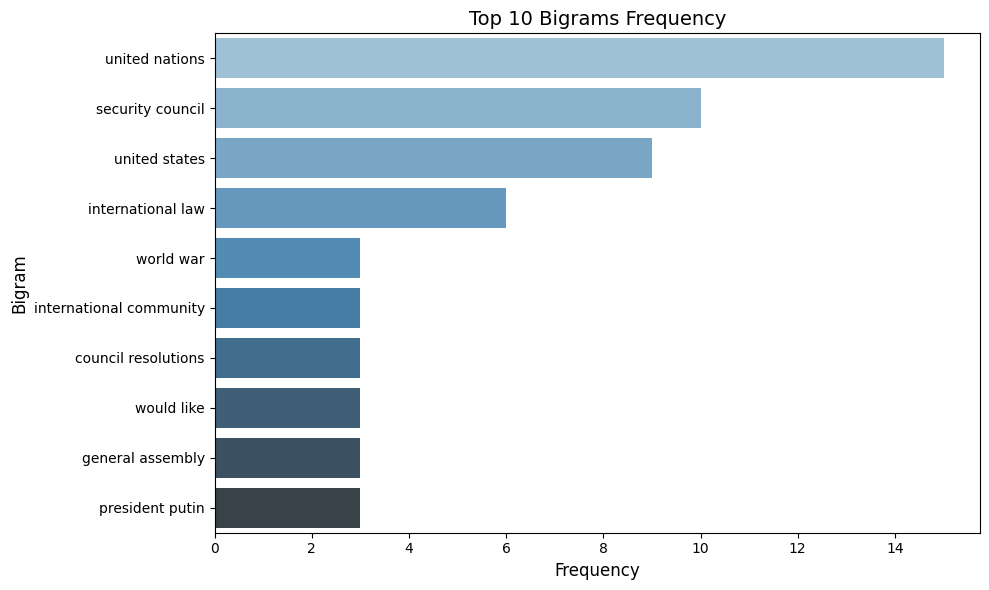

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Datos obtenidos (bigrams y frecuencias)
data = [(('united', 'nations'), 15),
        (('security', 'council'), 10),
        (('united', 'states'), 9),
        (('international', 'law'), 6),
        (('world', 'war'), 3),
        (('international', 'community'), 3),
        (('council', 'resolutions'), 3),
        (('would', 'like'), 3),
        (('general', 'assembly'), 3),
        (('president', 'putin'), 3)]

# Desempaquetamos los bigramas y sus frecuencias
bigrams, frequencies = zip(*data)
bigrams = [' '.join(bigram) for bigram in bigrams]  # Convertimos los bigrams a string

# Creamos un DataFrame para seaborn
df = pd.DataFrame({'bigram': bigrams, 'frequency': frequencies})

# Graficamos con Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='frequency', y='bigram', data=df, palette='Blues_d')

# Agregamos título y etiquetas
plt.title('Top 10 Bigrams Frequency', fontsize=14)
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Bigram', fontsize=12)

# Mostrar la gráfica
plt.tight_layout();
plt.show();